A1

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

data =  pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df = pd.DataFrame(data)

df = df.drop('stroke', axis=1)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# (assuming k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init explicitly
df['cluster'] = kmeans.fit_predict(df_scaled)

print(df[['id', 'cluster']])


         id  cluster
0      9046        0
1     51676        0
2     31112        0
3     60182        0
4      1665        1
...     ...      ...
5105  18234        1
5106  44873        0
5107  19723        0
5108  37544        0
5109  44679        0

[5110 rows x 2 columns]


A2

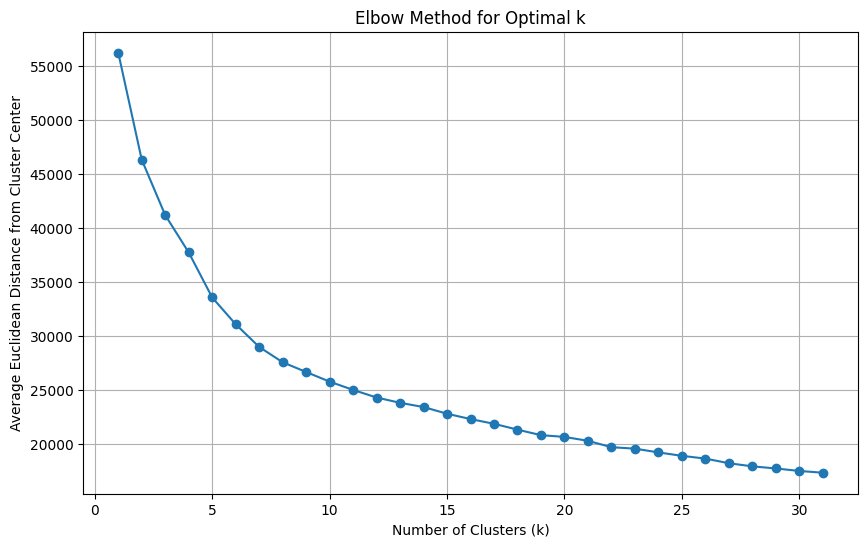

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


distortions = []
k_values = range(1, 32)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Cluster Center')
plt.grid(True)
plt.show()


A3

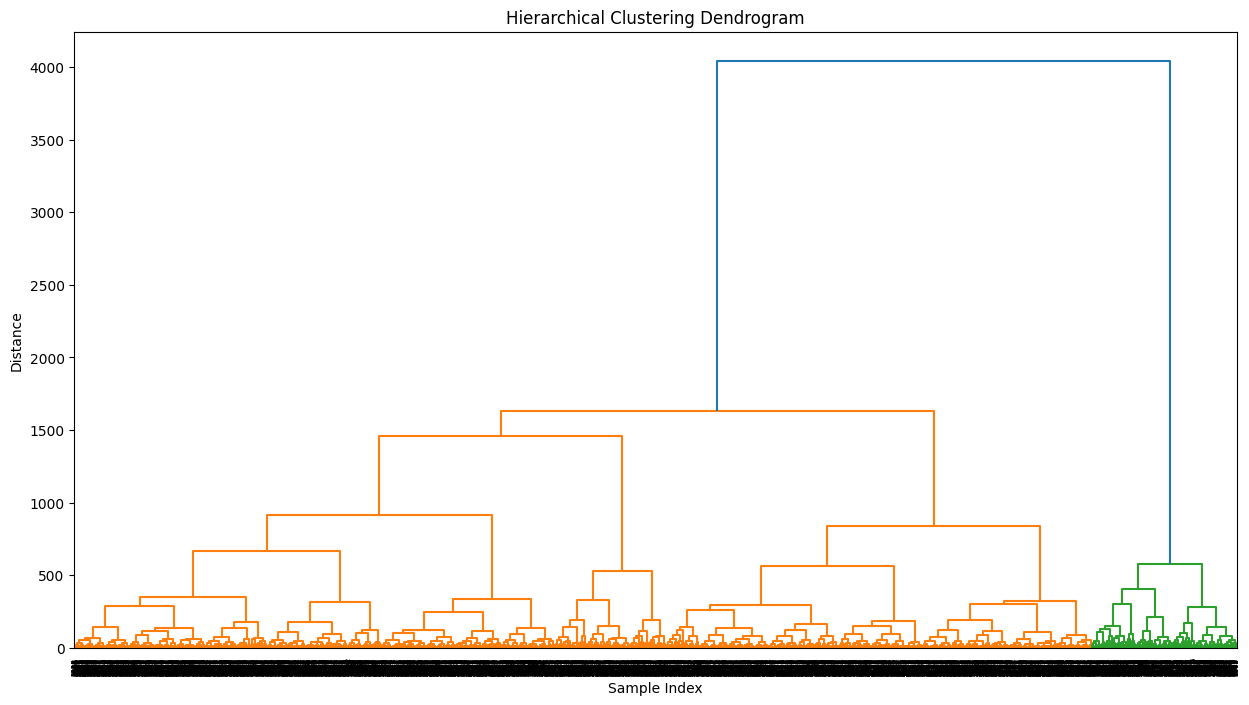

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data =  pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

df = pd.DataFrame(data)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

columns_for_clustering = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
df_clustering = df[columns_for_clustering]

linked = linkage(df_clustering, 'ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


A4

Selected Features Indices: [3]
Selected Features Names: Index(['gender_Female'], dtype='object')


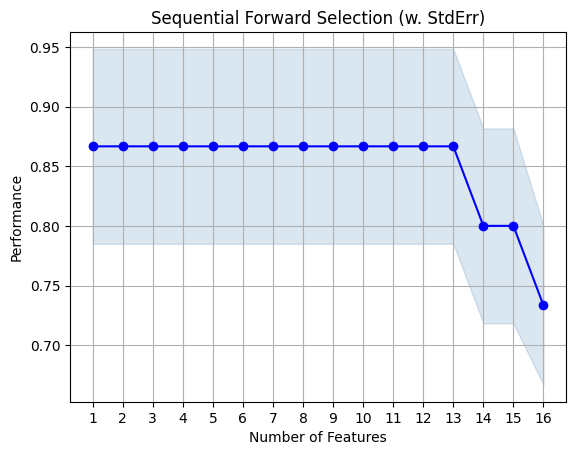

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
import matplotlib.pyplot as plt



df = pd.DataFrame(data)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

X = df.drop(['id', 'hypertension', 'heart_disease'], axis=1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, scoring='accuracy', cv=5)

sfs = sfs.fit(X_train, y_train)
selected_features = list(sfs.k_feature_idx_)
print("Selected Features Indices:", selected_features)
print("Selected Features Names:", X.columns[selected_features])

fig = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


A5

Number of components needed to capture 95% of the variance: 13


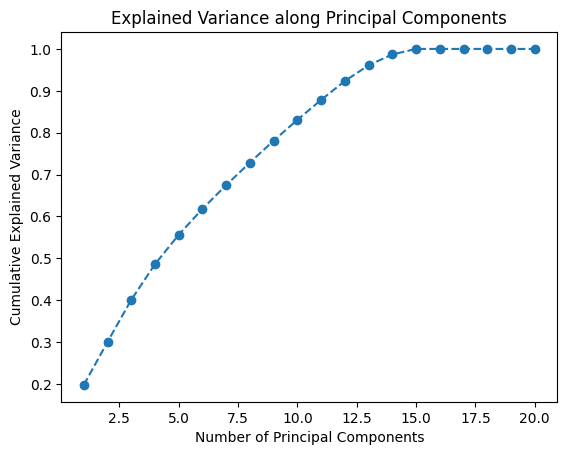

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


data =  pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

df = pd.DataFrame(data)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

X_pca = df.drop(['id', 'hypertension', 'heart_disease'], axis=1)

imputer = SimpleImputer(strategy='mean')
X_pca_imputed = imputer.fit_transform(X_pca)

scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca_imputed)

pca = PCA()
X_pca_result = pca.fit_transform(X_pca_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to capture 95% of the variance: {num_components}")

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance along Principal Components')
plt.show()
